In [96]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from config import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np
import seaborn as sns
from datetime import datetime

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [155]:
# Set the news list
targets = ['BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes', 'NPR']

In [165]:
total_mood = []

for target in targets:
    
    last_tweet = None
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    tweet_counter = 1
    
    for x in range(5):
        
        all_data = api.user_timeline(target, count=20, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood.append({'user': target,
                             'compound': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'tweets_ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at']})
            
            
            compound_list.append(emotions['compound'])
            positive_list.append(emotions['pos'])
            negative_list.append(emotions['neg'])
            neutral_list.append(emotions['neu'])
            tweets_ago = tweet_counter
            
            tweet_counter += 1
        
    
    
        last_tweet = tweet["id"] - 1
        
    #total_emo = {'user': target,
            #'compound': np.mean(compound_list),
            #'positive': np.mean(positive_list),
            #'negative': np.mean(negative_list),
            #'neutral': np.mean(neutral_list),
            #'tweet_count': len(compound_list)}
    
    #total_mood.append(total_emo)    
    
tweet['id']

979708125891780608

In [157]:
tweet['created_at']

'Fri Mar 30 13:06:18 +0000 2018'

In [44]:
total_mood

[{'compound': 0.22754000000000002,
  'negative': 0.0666,
  'neutral': 0.752,
  'positive': 0.1814,
  'tweet_count': 5,
  'user': 'BBC'},
 {'compound': 0.31222,
  'negative': 0.0,
  'neutral': 0.9116,
  'positive': 0.0884,
  'tweet_count': 5,
  'user': 'CBS'},
 {'compound': 0.1631,
  'negative': 0.057999999999999996,
  'neutral': 0.8298,
  'positive': 0.11199999999999999,
  'tweet_count': 5,
  'user': 'CNN'},
 {'compound': -0.07038,
  'negative': 0.10400000000000001,
  'neutral': 0.8048,
  'positive': 0.091,
  'tweet_count': 5,
  'user': 'FoxNews'},
 {'compound': 0.25007999999999997,
  'negative': 0.0256,
  'neutral': 0.8674,
  'positive': 0.10700000000000001,
  'tweet_count': 5,
  'user': 'nytimes'}]

In [166]:
df = pd.DataFrame(total_mood)
df.head(10)

,compound,negative,neutral,positive,text,time,tweets_ago,user
0,0.1531,0.000,0.897,0.103,"In a revealing and emotional journey, @LennyHe...",Mon Apr 02 19:02:04 +0000 2018,1,BBC
1,0.5423,0.000,0.837,0.163,A fictionalised account of how Dave Allen beca...,Mon Apr 02 18:45:06 +0000 2018,2,BBC
2,0.0000,0.000,1.000,0.000,Would you try a blue cheese and pear ice cream...,Mon Apr 02 17:08:03 +0000 2018,3,BBC
3,-0.5574,0.184,0.816,0.000,RT @BBCBreaking: South African anti-apartheid ...,Mon Apr 02 14:14:17 +0000 2018,4,BBC
4,0.4215,0.000,0.859,0.141,Is it easier to be a businesswoman in the West...,Mon Apr 02 13:32:07 +0000 2018,5,BBC
5,0.0000,0.000,1.000,0.000,RT @BBCWorld: Hill Street Blues creator Steven...,Mon Apr 02 11:58:06 +0000 2018,6,BBC
6,0.2235,0.000,0.894,0.106,"""I have cerebral palsy. But that won't stop me...",Mon Apr 02 11:07:00 +0000 2018,7,BBC
7,0.0000,0.000,1.000,0.000,From Easter egg nest cakes to hot cross buns: ...,Mon Apr 02 10:02:06 +0000 2018,8,BBC
8,0.0000,0.000,1.000,0.000,🥚 😮 @SandiToksvig knows how to squeeze an egg ...,Mon Apr 02 09:03:04 +0000 2018,9,BBC
9,0.0000,0.000,1.000,0.000,RT @BBCScotlandNews: Commonwealth Games: Eilid...,Mon Apr 02 08:16:56 +0000 2018,10,BBC


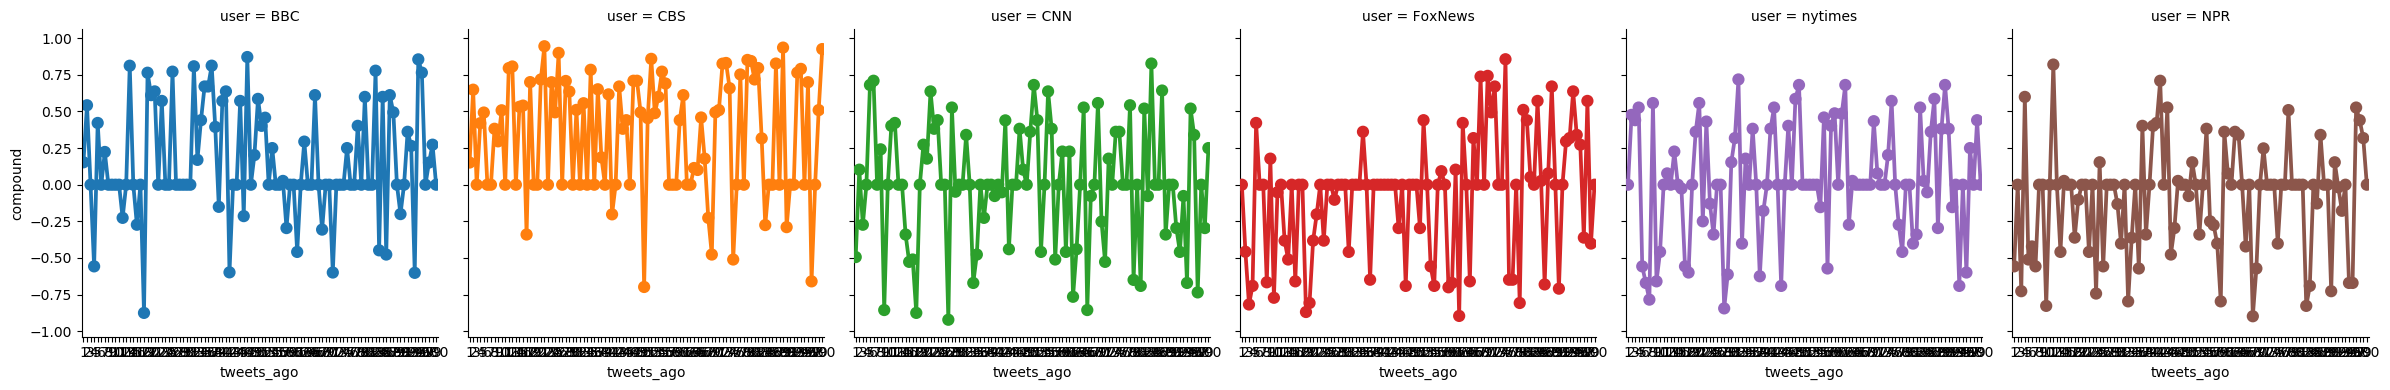

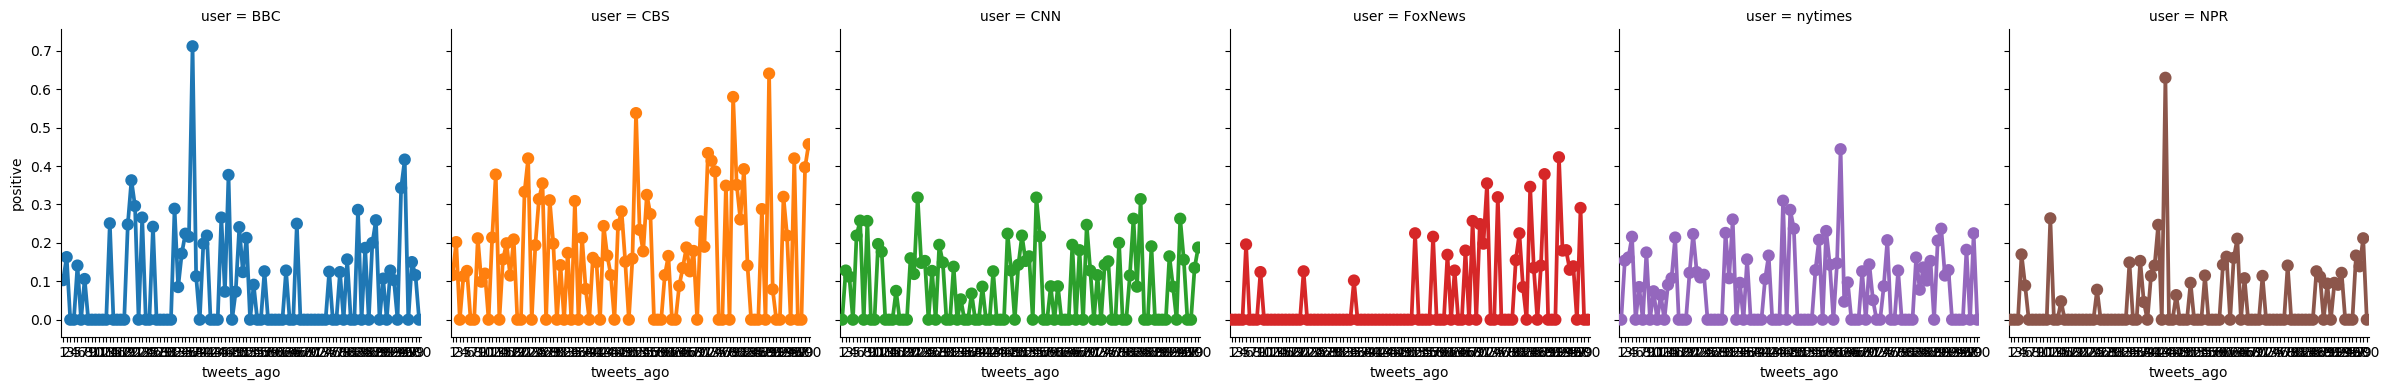

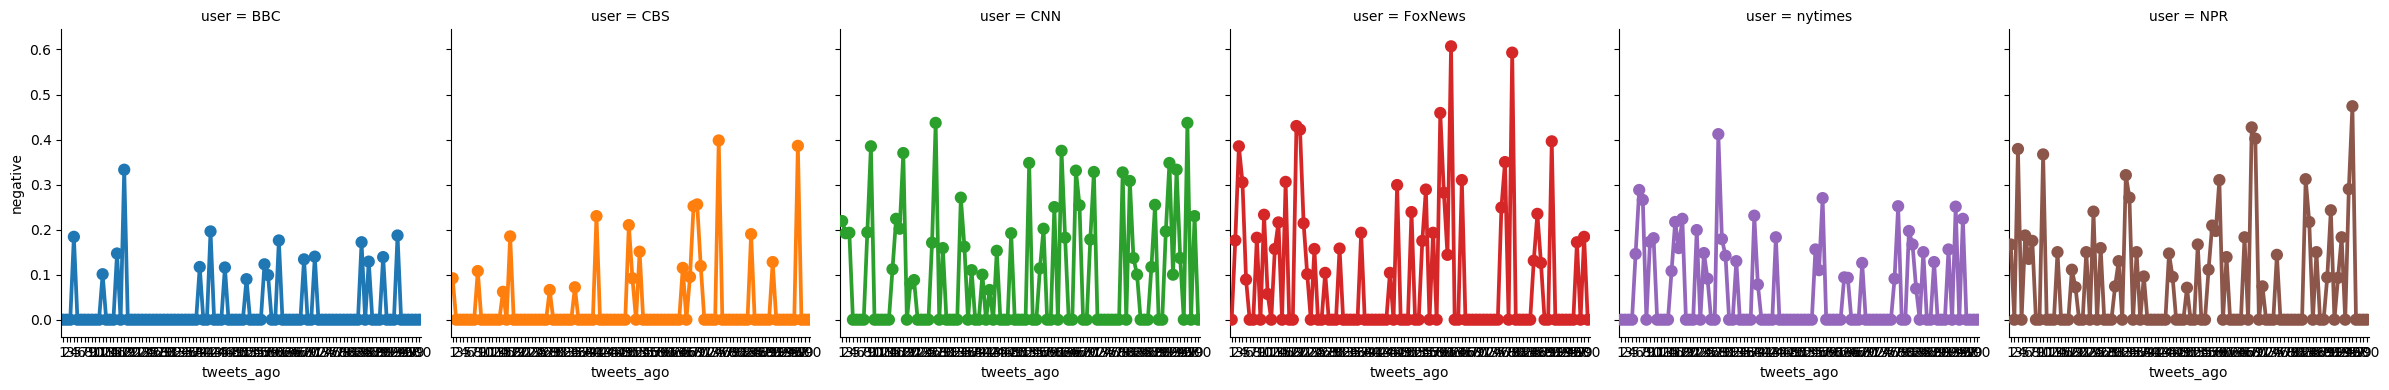

In [171]:
# Look at each news source separately
plt.rcParams.update(plt.rcParamsDefault) # Set default plot style
sns.factorplot(data=df, x="tweets_ago", y="compound", col="user", hue='user',)
sns.factorplot(data=df, x="tweets_ago", y="positive", col="user", hue='user')
sns.factorplot(data=df, x="tweets_ago", y="negative", col="user", hue='user')

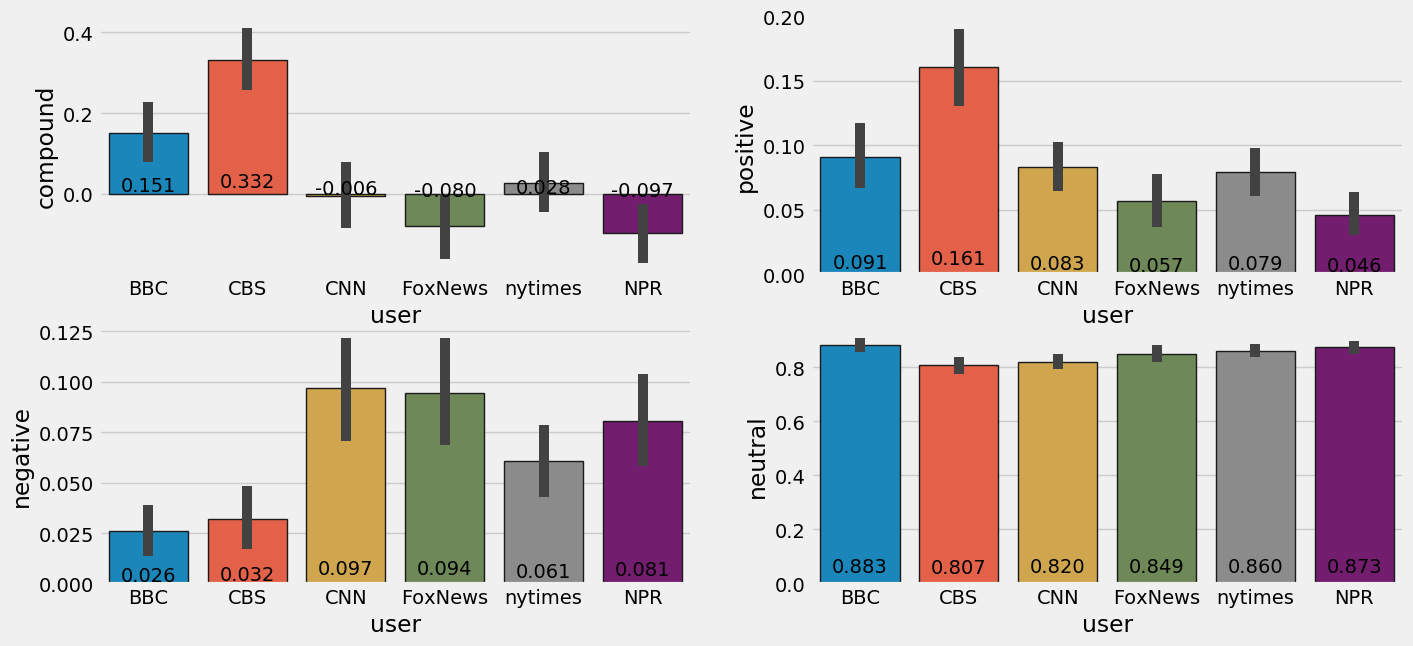

In [232]:

plt.figure(figsize=(15,7))
style.use('fivethirtyeight')
plt.subplot(2,2,1)
ax = sns.barplot('user', 'compound', data=df, linewidth=1, edgecolor=".1")
for p in ax.patches: 
    ax.text(p.get_x()+p.get_width()/2., p.get_height()*0.05, '{:1.3f}'.format(p.get_height()), ha="center")
plt.subplot(2,2,2)
ax = sns.barplot('user', 'positive', data=df, linewidth=1, edgecolor=".1")
for p in ax.patches:
    #height = p.get_height()*0.05
    ax.text(p.get_x()+p.get_width()/2., p.get_height()*0.05, '{:1.3f}'.format(p.get_height()), ha="center")
plt.subplot(2,2,3)
ax = sns.barplot('user', 'negative', data=df, linewidth=1, edgecolor=".1")
for p in ax.patches: 
    ax.text(p.get_x()+p.get_width()/2., p.get_height()*0.05, '{:1.3f}'.format(p.get_height()), ha="center")
plt.subplot(2,2,4)
ax = sns.barplot('user', 'neutral', data=df, linewidth=1, edgecolor=".1")
for p in ax.patches: 
    ax.text(p.get_x()+p.get_width()/2., p.get_height()*0.05, '{:1.3f}'.format(p.get_height()), ha="center")

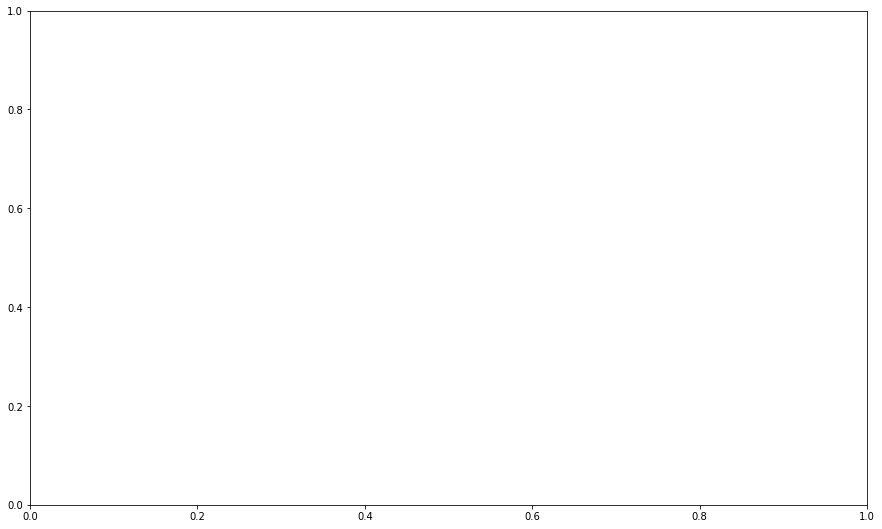

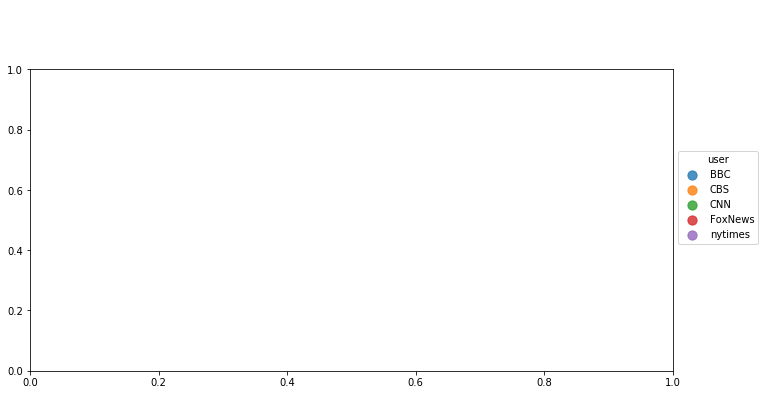

In [128]:
plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
sns.lmplot(x='tweets_ago', y='compound', data=df, hue="user", fit_reg=False, scatter=True, size=10,
           scatter_kws={"s":85})
plt.subplot(2,1,2)
#sns.FacetGrid(df, 'tweets_ago', 'compound',  hue_kws={"marker": ["^", "v", 'o', 'D', '+']})
#pl.map(plt.scatter,  s=100, linewidth=.5, edgecolor="white")

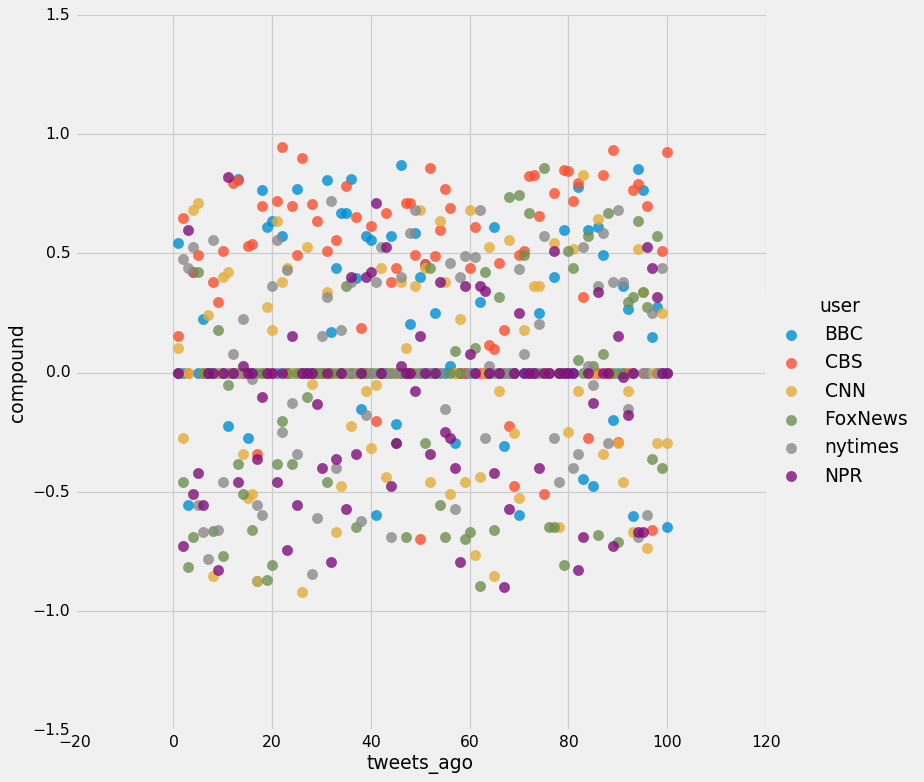

In [163]:
plt.figure()

sns.lmplot(x='tweets_ago', y='compound', data=df, hue="user", fit_reg=False, scatter=True, size=10,
           scatter_kws={"s":85})

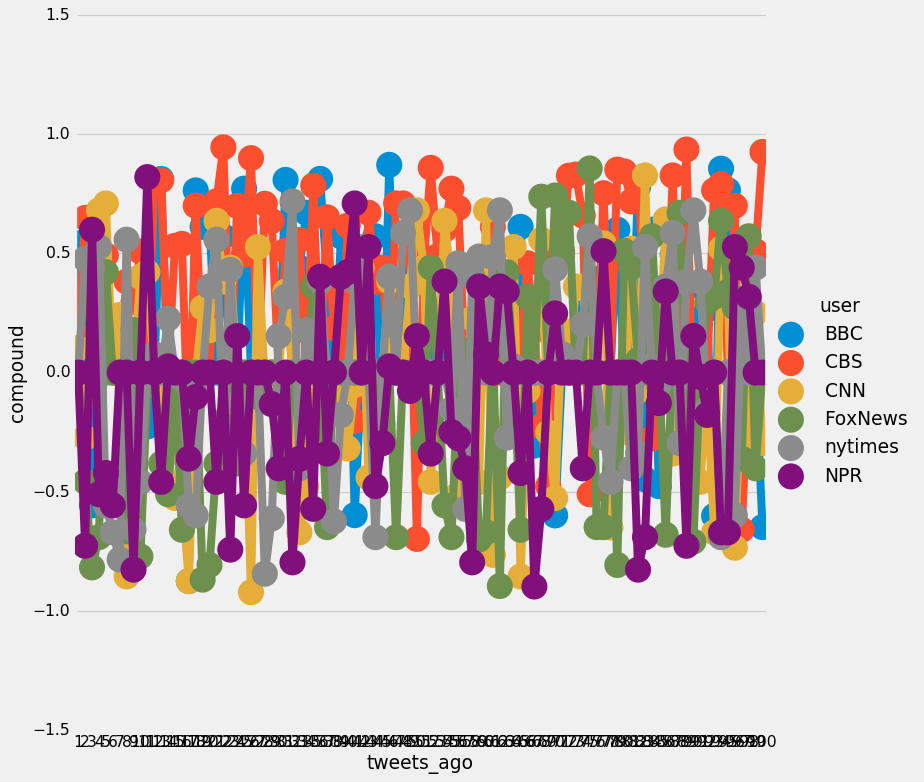

In [164]:
sns.factorplot(data=df, x="tweets_ago", y="compound", size=10, hue='user')